In [18]:
import eeg_research.preprocessing.tools.utils as utils
import eeg_research.preprocessing.pipelines.eeg_preprocessing_pipeline as pipe
import eeg_research.preprocessing.tools.artifacts_annotator as annotator
import numpy as np
import mne
from pathlib import Path
import glob
import numpy as np
import matplotlib.pyplot as plt
import extract_eeg_features
import scipy
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("/home/slouviot/01_projects/eeg_brain_state_prediction/figures/quality_control_without_blinks_removal.pdf")
plt.rcParams['text.usetex'] = False
mne.set_log_level(verbose='CRITICAL')
path = Path("/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BVA_GR_CB_BK_NOV2024/")
file_instruction = str(path) + f"/sub-*_ses-01_task-checker_run-*_desc-GdCb_eeg.edf"
filenames = glob.glob(file_instruction)
data_size = list()
eeg_list = list()
def find_part(filename, part:str):
    filename = Path(filename)
    file_entities = str(filename.name).split('_')
    for entity in file_entities:
        if part in entity:
            return entity
filenames.sort()
for filename in filenames:
    raw = mne.io.read_raw_edf(filename, preload=True)
    raw = extract_eeg_features.extract_eeg_only(raw)
    eeg_features = extract_eeg_features.EEGfeatures(raw)
    raw.crop(*eeg_features.croping_values)
    raw.resample(250).notch_filter(60).filter(0.5,70)
    data = raw.get_data()
    subject = find_part(filename, 'sub-')
    fft_eeg_pat = scipy.fft.rfft(raw.get_data())
    freqs = scipy.fft.rfftfreq(raw.get_data().shape[1], d=1./250)
    hilbert = raw.copy().apply_hilbert(envelope = True).get_data()

    fig, ax = plt.subplots(3,1,figsize = (8.5,11))
    ax[0].plot(raw.times,data.T,"black", alpha = 0.3, linewidth = 1, label = 'individual electrodes')
    ax[0].plot(raw.times,np.mean(data,axis = 0), "red", alpha = 0.8, linewidth = 1, label = 'average across electrodes')
    ax[0].set_ylabel('amplitude (V)')
    ax[0].set_xlabel('time (s)')
    ax[0].set_title(f"Raw time serie for {subject}")
    ax[1].plot(freqs,abs(fft_eeg_pat).T, "black", alpha = 0.3, linewidth = 1, label = 'individual electrodes')
    ax[1].plot(freqs,np.mean(abs(fft_eeg_pat), axis = 0), "r", alpha = 0.9, linewidth = 1, label = 'average across electrodes')
    ax[1].set_xlim(0,40)
    ax[1].set_title(f'FFT for {subject}')
    ax[1].set_xlabel('frequency (Hz)')
    ax[1].set_ylabel(r"Power (${\mu}V^2{\cdot}Hz^{-1}$)")
    ax[2].plot(raw.times,hilbert.T, "black", alpha = 0.3, linewidth = 1, label = 'individual electrodes')
    ax[2].plot(raw.times,np.mean(hilbert, axis =0), "red", alpha = 0.8, linewidth = 1, label = 'individual electrodes')
    ax[2].set_title(f"30Hz - 70Hz envelope for {subject}")
    ax[2].set_xlabel("time (s)")
    ax[2].set_ylabel("amplitude (V)")
    fig.legend()
    plt.tight_layout()
    pdf.savefig( fig , dpi = 100)
    plt.close(fig)
    
    
    data_size.append(data.shape[1])
    eeg_list.append(data)
    min_length = min(data_size)
for idx, data in enumerate(eeg_list):
    eeg_list[idx] = data[:,:min_length]
  
fig, ax = plt.subplots(3,1,figsize = (8.5,11))
eegs = np.stack(eeg_list, axis = 0)
avg_eeg = np.mean(eegs, axis = 0)

fft_eeg_pat = scipy.fft.rfft(avg_eeg)
freqs = scipy.fft.rfftfreq(avg_eeg.shape[1], d=1./250)
raw_avg = mne.io.RawArray(avg_eeg,raw.info)
hilbert_avg = raw_avg.copy().apply_hilbert(envelope = True).get_data()

times = np.arange(0,avg_eeg.shape[1]/250,1/250)
ax[0].plot(times,avg_eeg.T,"tab:blue", alpha = 0.3, linewidth = 1, label = 'indivudal electrodes')
ax[0].plot(times,np.mean(avg_eeg,axis = 0), "red", alpha = 0.8, linewidth = 1, label = 'averaged across electrodes')
ax[0].set_ylabel('amplitude (V)')
ax[0].set_xlabel('time (s)')
ax[0].set_title(f"Raw signal averaged across subjects")
ax[1].plot(freqs,abs(fft_eeg_pat).T, "tab:blue", alpha = 0.3, linewidth = 1,label = 'indivudal electrodes')
ax[1].plot(freqs,np.mean(abs(fft_eeg_pat), axis = 0), "r", alpha = 0.9, linewidth = 1,label = 'averaged across electrodes')
ax[1].set_xlim(0,40)
ax[1].set_title(f'FFT or signal averaged across subjects')
ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel(r"Power (${\mu}V^2{\cdot}Hz^{-1}$)")
ax[2].plot(times,hilbert_avg.T, "tab:blue", alpha = 0.3, linewidth = 1, label = 'indivudal electrodes')
ax[2].plot(times,np.mean(hilbert_avg, axis =0), "red", alpha = 0.8, linewidth = 1, label = 'averaged across electrodes')
ax[2].set_title(f"30Hz - 70Hz envelope of signal averaged across subjects")
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel("amplitude (V)")
pdf.savefig(fig, dpi = 100)
plt.close(fig)
pdf.close()

	cropping: from 31.288 to 237.09199999999998 seconds

	cropping: from 37.568 to 243.368 seconds

	cropping: from 28.524 to 234.32399999999998 seconds

	cropping: from 55.6 to 261.404 seconds

	cropping: from 84.908 to 290.708 seconds

	cropping: from 29.616 to 235.416 seconds

	cropping: from 51.584 to 257.38 seconds

	cropping: from 36.856 to 242.656 seconds

	cropping: from 35.544 to 241.34799999999998 seconds

	cropping: from 63.268 to 269.06800000000004 seconds

	cropping: from 57.792 to 263.588 seconds

	cropping: from 27.452 to 233.25199999999998 seconds

	cropping: from 44.984 to 250.78799999999998 seconds

	cropping: from 68.72 to 273.524 seconds

	cropping: from 25.4 to 230.196 seconds

	cropping: from 41.956 to 247.256 seconds

	cropping: from 19.92 to 225.716 seconds

	cropping: from 96.44 to 302.244 seconds

	cropping: from 54.944 to 260.744 seconds

	cropping: from 22.332 to 228.132 seconds

	cropping: from 61.088 to 266.88800000000003 seconds

	cropping: from 46.812 to 25

In [24]:
import eeg_research.preprocessing.tools.utils as utils
import eeg_research.preprocessing.pipelines.eeg_preprocessing_pipeline as pipe
import eeg_research.preprocessing.tools.artifacts_annotator as annotator
import numpy as np
import mne
from pathlib import Path
import glob
import numpy as np
import matplotlib.pyplot as plt
import extract_eeg_features
import scipy
import matplotlib.backends.backend_pdf

pipelines = ['old_data','blinks_removed', 'blinks_not_removed']

for pipeline in pipelines:
    if pipeline == 'old_data':
        path = Path("/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF")
        pdf_name = "quality_control_old_data.pdf"
        description = ""
    else:
        path = Path("/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BVA_GR_CB_BK_NOV2024/")
        if pipeline == "blinks_removed":
            description = "_desc-GdCbBk"
            pdf_name = "quality_control_with_blinks_removal.pdf"
        elif pipeline == "blinks_not_removed":
            pdf_name = "quality_control_without_blinks_removal.pdf"
            description = "_desc-GdCb"

    pdf = matplotlib.backends.backend_pdf.PdfPages(f"/home/slouviot/01_projects/eeg_brain_state_prediction/figures/{pdf_name}")
    plt.rcParams['text.usetex'] = False
    mne.set_log_level(verbose='CRITICAL')
    file_instruction = str(path) + f"/sub-*_ses-01_task-checker_run-*{description}_eeg.edf"
    filenames = glob.glob(file_instruction)
    data_size = list()
    eeg_list = list()
    def find_part(filename, part:str):
        filename = Path(filename)
        file_entities = str(filename.name).split('_')
        for entity in file_entities:
            if part in entity:
                return entity
    filenames.sort()
    for filename in filenames:
        if "GradientStep1" in filename:
            continue
        raw = mne.io.read_raw_edf(filename, preload = True)
        raw = extract_eeg_features.extract_eeg_only(raw)
        eeg_features = extract_eeg_features.EEGfeatures(raw)
        raw.resample(250).notch_filter(60).filter(0.5,70)
        start = eeg_features.croping_values[0] + 2
        stop = eeg_features.croping_values[1] - 2
        raw.crop(start,stop)
        data = raw.get_data()
        subject = find_part(filename, 'sub-')
        fft_eeg_pat = scipy.fft.rfft(raw.get_data())
        freqs = scipy.fft.rfftfreq(raw.get_data().shape[1], d=1./250)
        hilbert = raw.copy().apply_hilbert(envelope = True).get_data()

        fig, ax = plt.subplots(3,1,figsize = (8.5,11))
        ax[0].plot(raw.times,np.mean(data,axis = 0), "black", alpha = 0.8, linewidth = 1)
        ax[0].set_ylabel('amplitude (V)')
        ax[0].set_xlabel('time (s)')
        ax[0].set_title(f"Raw time serie for {subject} averaged across electrodes")
        ax[1].plot(freqs,np.mean(abs(fft_eeg_pat), axis = 0), "black", alpha = 0.9, linewidth = 1)
        ax[1].set_xlim(0,40)
        ax[1].set_title(f'FFT for {subject} averaged across electrodes')
        ax[1].set_xlabel('frequency (Hz)')
        ax[1].set_ylabel(r"Power (${\mu}V^2{\cdot}Hz^{-1}$)")
        ax[2].plot(raw.times,np.mean(hilbert, axis =0), "black", alpha = 0.8, linewidth = 1)
        ax[2].set_title(f"30Hz - 70Hz envelope for {subject} averaged across electrodes")
        ax[2].set_xlabel("time (s)")
        ax[2].set_ylabel("amplitude (V)")
        plt.tight_layout()
        pdf.savefig( fig , dpi = 100)
        plt.close(fig)
        
        
        data_size.append(data.shape[1])
        eeg_list.append(data)
        min_length = min(data_size)
    for idx, data in enumerate(eeg_list):
        eeg_list[idx] = data[:,:min_length]
    
    fig, ax = plt.subplots(3,1,figsize = (8.5,11))
    eegs = np.stack(eeg_list, axis = 0)
    avg_eeg = np.mean(eegs, axis = 0)

    fft_eeg_pat = scipy.fft.rfft(avg_eeg)
    freqs = scipy.fft.rfftfreq(avg_eeg.shape[1], d=1./250)
    raw_avg = mne.io.RawArray(avg_eeg,raw.info)
    hilbert_avg = raw_avg.copy().apply_hilbert(envelope = True).get_data()

    times = np.arange(0,avg_eeg.shape[1]/250,1/250)
    ax[0].plot(times,avg_eeg.T,"tab:blue", alpha = 0.3, linewidth = 1, label = 'indivudal electrodes')
    ax[0].plot(times,np.mean(avg_eeg,axis = 0), "red", alpha = 0.8, linewidth = 1, label = 'averaged across electrodes')
    ax[0].set_ylabel('amplitude (V)')
    ax[0].set_xlabel('time (s)')
    ax[0].set_title(f"Raw signal averaged across subjects")
    ax[1].plot(freqs,abs(fft_eeg_pat).T, "tab:blue", alpha = 0.3, linewidth = 1,label = 'indivudal electrodes')
    ax[1].plot(freqs,np.mean(abs(fft_eeg_pat), axis = 0), "r", alpha = 0.9, linewidth = 1,label = 'averaged across electrodes')
    ax[1].set_xlim(0,40)
    ax[1].set_title(f'FFT or signal averaged across subjects')
    ax[1].set_xlabel('frequency (Hz)')
    ax[1].set_ylabel(r"Power (${\mu}V^2{\cdot}Hz^{-1}$)")
    ax[2].plot(times,hilbert_avg.T, "tab:blue", alpha = 0.3, linewidth = 1, label = 'indivudal electrodes')
    ax[2].plot(times,np.mean(hilbert_avg, axis =0), "red", alpha = 0.8, linewidth = 1, label = 'averaged across electrodes')
    ax[2].set_title(f"30Hz - 70Hz envelope of signal averaged across subjects")
    ax[2].set_xlabel("time (s)")
    ax[2].set_ylabel("amplitude (V)")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    pdf.savefig(fig, dpi = 100)
    plt.close(fig)
    pdf.close()

	cropping: from 31.288 to 237.088 seconds

	cropping: from 37.568 to 243.368 seconds

	cropping: from 28.524 to 234.32399999999998 seconds

	cropping: from 84.908 to 290.708 seconds

	cropping: from 29.616 to 235.416 seconds

	cropping: from 51.58 to 257.38 seconds

	cropping: from 36.856 to 242.656 seconds

	cropping: from 35.544 to 241.344 seconds

	cropping: from 63.268 to 269.06800000000004 seconds

	cropping: from 63.268 to 269.06800000000004 seconds

	cropping: from 57.788 to 263.588 seconds

	cropping: from 27.452 to 233.25199999999998 seconds

	cropping: from 44.984 to 250.784 seconds

	cropping: from 68.72 to 273.52000000000004 seconds

	cropping: from 25.396 to 230.196 seconds

	cropping: from 41.956 to 247.256 seconds

	cropping: from 96.44 to 302.24 seconds

	cropping: from 54.944 to 260.744 seconds

	cropping: from 22.332 to 228.132 seconds

	cropping: from 61.088 to 266.88800000000003 seconds

	cropping: from 61.088 to 266.88800000000003 seconds

	cropping: from 46.812 to

In [16]:
filenames

['/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-01_ses-01_task-checker_run-01_desc-GradientStep1_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-01_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-02_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-03_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-05_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-06_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-07_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-08_ses-01_task-checker_run-01_desc-GradientStep1_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-08_ses-01_task-checker_run-01_eeg.edf',
 '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-09_ses-01_task-checker_run-01_desc-GradientStep1_eeg

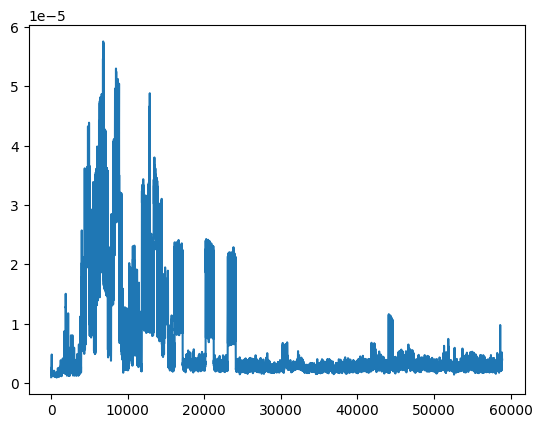

In [25]:
plt.plot(avg_eeg[4,:])
#plt.xlim(10000,10500)

In [15]:
raw.info['ch_names']

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'POz',
 'ECG',
 'F1',
 'F2',
 'C1',
 'C2',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FC3',
 'FC4',
 'CP3',
 'CP4',
 'PO3',
 'PO4',
 'F5',
 'F6',
 'C5',
 'C6',
 'P5',
 'P6',
 'AF7',
 'AF8',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'Fpz',
 'CPz',
 'EOGL',
 'EOGU',
 'FCz']

In [21]:
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage, on_missing = 'ignore')


<RawEDF | sub-15_ses-01_task-checker_run-01_desc-GdCb_eeg.edf, 65 x 58875 (235.5 s), ~29.3 MB, data loaded>

In [22]:
raw.pick_types(eeg = True)

<RawEDF | sub-15_ses-01_task-checker_run-01_desc-GdCb_eeg.edf, 65 x 58875 (235.5 s), ~29.3 MB, data loaded>

In [9]:
import scipy
fft_eeg = scipy.fft.rfft(avg_eeg)

In [10]:
fft_eeg.shape

(65, 29438)

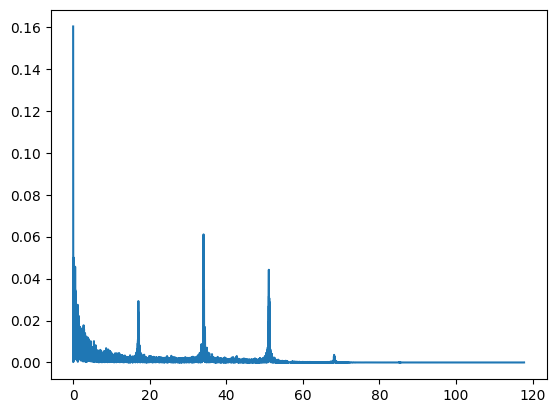

In [14]:
freqs = np.linspace(0,29437,29438)/250
plt.plot(freqs, abs(fft_eeg[0,:]))